# Clustering and the $k$-means algorithm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

<font color = 'green'> __Supervised learning:__ <font color = 'red'> **Machine learning where we have labeled data -- meaning we know the true values of the target variable for our training examples. The goal is to get the algorithm to correctly predict the target variable as accurately as possible. This is called "supervised" because we use our knowledge of the correct answer to monitor the algorithm's performance and adjust the parameters until it is as accurate as possible.**

<font color = 'green'> __Unsupervised learning:__ <font color = 'red'> **Learning where we don't have labeled data -- either we don't know the true values of the target variable or we don't even really know how it should be defined. The goal now is to discover patterns that exist naturally in the data, without reference to a target variable.**

<font color = 'green'> __Clustering:__ <font color = 'red'> **The unsupervised analogue of classification. In clustering, we try to find natural "groups" existing in the data.**

### Example: fake data

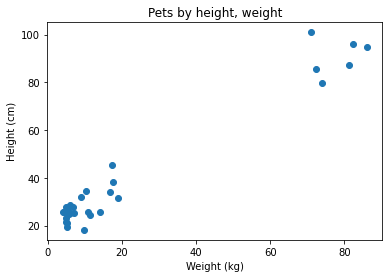

In [2]:
pets = pd.read_csv('pets.csv', index_col=0)
pets
plt.plot(pets.loc[:,'weight'], pets.loc[:,'height'], 'o')
plt.title('Pets by height, weight')
plt.ylabel('Height (cm)')
plt.xlabel('Weight (kg)')
plt.show()

If we don't know in advance that these are dogs, ponies, etc., we can still clearly see that the points naturally fall into several groups.

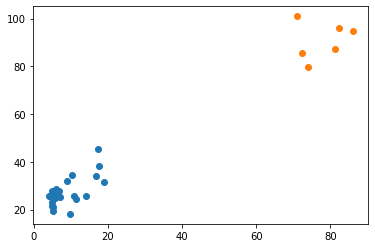

In [3]:
pets_unlabeled = pets.drop('label', axis = 1)
cls = KMeans(n_clusters=2)
cls.fit(X=pets_unlabeled.values)
labels = cls.predict(pets_unlabeled.values)

cluster_0 = pets_unlabeled.loc[labels == 0].values
cluster_1 = pets_unlabeled.loc[labels == 1].values
plt.plot(cluster_0[:,1], cluster_0[:,0], 'o')
plt.plot(cluster_1[:,1], cluster_1[:,0], 'o')

Notice we had to specify the number of groups we were looking for. $k$, the number of clusters, is a hyperparameter -- we have to select it before training the model. (This is similar to the situation in $k$-nearest neighbors, but be careful -- these are not the same $k$!)

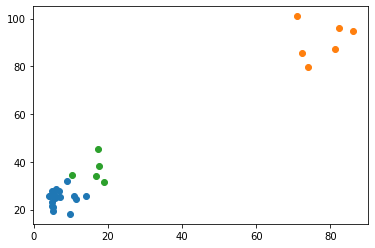

In [4]:
pets_unlabeled = pets.drop('label', axis = 1)
cls = KMeans(n_clusters=3)
cls.fit(X=pets_unlabeled.values)
labels = cls.predict(pets_unlabeled.values)

cluster_0 = pets_unlabeled.loc[labels == 0].values
cluster_1 = pets_unlabeled.loc[labels == 1].values
cluster_2 = pets_unlabeled.loc[labels == 2].values
plt.plot(cluster_0[:,1], cluster_0[:,0], 'o')
plt.plot(cluster_1[:,1], cluster_1[:,0], 'o')
plt.plot(cluster_2[:,1], cluster_2[:,0], 'o')

This successfully isolates the ponies, but can't perfectly separate the cats and dogs. But this is not unexpected -- we saw that can be hard even with labeled data.

What if we increase the number of clusters even more?

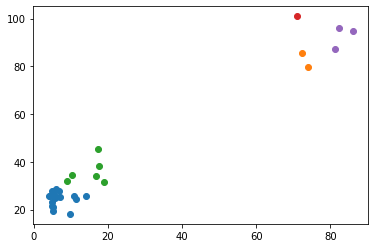

In [5]:
# Run this cell a few times, see if anything changes
pets_unlabeled = pets.drop('label', axis = 1)
cls = KMeans(n_clusters=5)
cls.fit(X=pets_unlabeled.values)
labels = cls.predict(pets_unlabeled.values)

cluster_0 = pets_unlabeled.loc[labels == 0].values
cluster_1 = pets_unlabeled.loc[labels == 1].values
cluster_2 = pets_unlabeled.loc[labels == 2].values
cluster_3 = pets_unlabeled.loc[labels == 3].values
cluster_4 = pets_unlabeled.loc[labels == 4].values
plt.plot(cluster_0[:,1], cluster_0[:,0], 'o')
plt.plot(cluster_1[:,1], cluster_1[:,0], 'o')
plt.plot(cluster_2[:,1], cluster_2[:,0], 'o')
plt.plot(cluster_3[:,1], cluster_3[:,0], 'o')
plt.plot(cluster_4[:,1], cluster_4[:,0], 'o')

In some cases, the algorithm will not find the same clusters every time. We'll see why this is in the lecture videos over the weekend, when we go over how the algorithm actually works.

### Preprocessing

<font color = 'green'> __Preprocessing:__ <font color = 'red'> **Transformations or processing we apply to data to make our algorithms perform better. Often this involves scaling our data so that differences in units don't matter.**

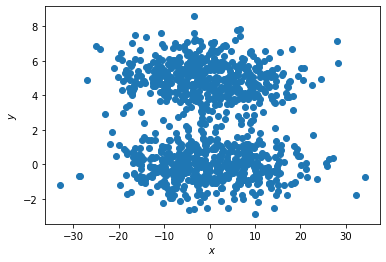

In [6]:
# Generate some fake data
x = 10*np.random.randn(1000)
y = np.concatenate((np.random.randn(500), np.random.randn(500) + 5))
plt.plot(x, y, 'o')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

Looking at the data we can see two obvious clusters of points. So we let our $k$-means algorithm try to find them.

In [7]:
frame = pd.DataFrame([(a, b) for (a,b) in zip(x, y)], columns = ['x', 'y']) # Make a frame
cls = KMeans(n_clusters=2)           # k is a hyperparameter we have to choose
cls.fit(X=frame.values)              # Run the k-means algorithm
labels = cls.predict(frame.values)   # Label which points belong to which clusters

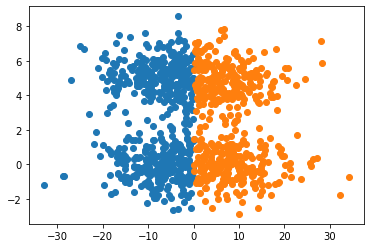

In [8]:
# Let's see what clusters the algorithm found.

cluster_0 = frame.loc[np.where(labels == 0)].values
cluster_1 = frame.loc[np.where(labels == 1)].values
plt.plot(cluster_0[:,0], cluster_0[:,1], 'o')
plt.plot(cluster_1[:,0], cluster_1[:,1], 'o')

That's not good! Instead of detecting the two clusters that seem obvious to our eyes, it has split them both in half. Why?

$k$-means, even though it's not quite a nearest-neighbor algorithm, is still based on distances: it classifies observations by their distance from an average point. The problem here is that the $y$ variable is the most informative variable; but, the $x$-coordinates vary on a much wider scale. So distances are dominated by distances in the $x$-direction.

In [9]:
# Try scaling the data
scaler = StandardScaler()
scaler.fit(frame.values)
X_scaled = scaler.transform(frame.values) # X_scaled contains the z-scores (standardized scores)
cls = KMeans(n_clusters=2)           
cls.fit(X=X_scaled)              
labels = cls.predict(X_scaled)

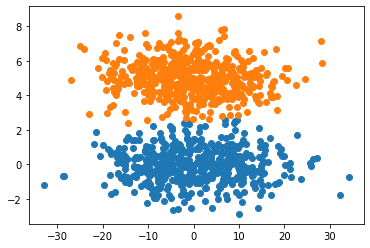

In [10]:
# Let's see what clusters the algorithm found.

cluster_0 = frame.loc[np.where(labels == 0)].values
cluster_1 = frame.loc[np.where(labels == 1)].values
plt.plot(cluster_0[:,0], cluster_0[:,1], 'o')
plt.plot(cluster_1[:,0], cluster_1[:,1], 'o')

Much better!

Although this example was with artificial data, the problem is real. Most real data is measured in some kind of units, and changing the units (e.g. going from meters to cm) can drastically change the scales of different variables. This can negatively impact the performance of $k$-means.

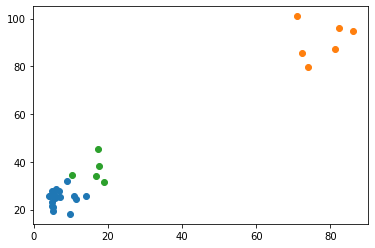

In [11]:
pets_unlabeled = pets.drop('label', axis = 1)
scaler.fit(pets_unlabeled.values)
X_scaled = scaler.transform(pets_unlabeled.values)
cls = KMeans(n_clusters=3)
cls.fit(X=X_scaled)
labels = cls.predict(X_scaled)

cluster_0 = pets_unlabeled.loc[labels == 0].values
cluster_1 = pets_unlabeled.loc[labels == 1].values
cluster_2 = pets_unlabeled.loc[labels == 2].values
plt.plot(cluster_0[:,1], cluster_0[:,0], 'o')
plt.plot(cluster_1[:,1], cluster_1[:,0], 'o')
plt.plot(cluster_2[:,1], cluster_2[:,0], 'o')

### Example: unknown wine

The following data is from a chemical analysis of wines grown in Italy. The wines all come from the same region, but from three different cultivars (types of grape).

Can we cluster the wines correctly so that we know which wines came from the same cultivar?

In [12]:
wine = pd.read_csv('wine_noclass.csv')        # the wine data without labels
labels = pd.read_csv('wine.data')['Class']  # the correct labels, for later comparison
wine.columns

Index(['Alcohol', 'Malic Acid', 'Ash', 'Alkalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocynanins', 'Color intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

That's a lot of variables; let's pick a few to plot against one another.

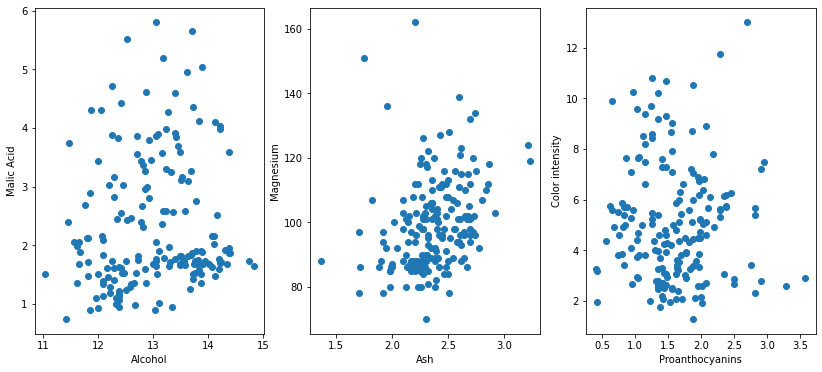

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (14, 6))
ax1.plot(wine['Alcohol'], wine['Malic Acid'], 'o')
ax1.set_xlabel('Alcohol')
ax1.set_ylabel('Malic Acid')
ax2.plot(wine['Ash'], wine['Magnesium'], 'o')
ax2.set_xlabel('Ash')
ax2.set_ylabel('Magnesium')
ax3.plot(wine['Proanthocynanins'], wine['Color intensity'], 'o')
ax3.set_xlabel('Proanthocyanins')
ax3.set_ylabel('Color intensity')
plt.show()

The three clusters are now not so easily distinguishable by eye. So, we can benefit by using some ML to try to extract them. Let's try running $k$-means on this data set. We know in advance that there should be three groups, so we can choose $k = 3$.

In [14]:
cls = KMeans(n_clusters=3) 
cls.fit(X=wine.values) 
clusters = cls.predict(wine.values)

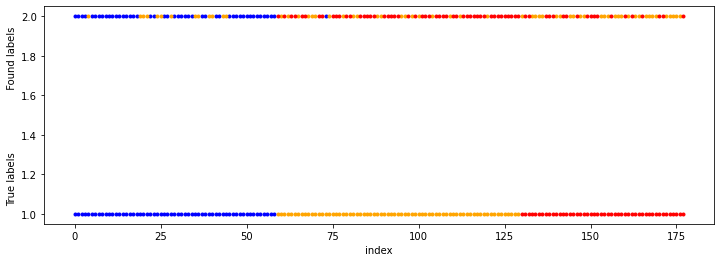

In [15]:
# Use a plot to compare the true labels to the found labels
ax = plt.figure(figsize = (12, 4))
true_clusters = [wine.index[labels == i] for i in range(1,4)]     # in the data set labels are 1, 2, 3
found_clusters = [wine.index[clusters == i] for i in range(3)]    # but kmeans will label them 0, 1, 2
found_clusters.sort(key = lambda l: min(l))                     # kmeans doesn't order clusters
colors = ['blue', 'orange', 'red']
for i in range(3):
    plt.plot(true_clusters[i], np.ones_like(true_clusters[i]), '.', color = colors[i])
    plt.plot(found_clusters[i], 2 * np.ones_like(found_clusters[i]), '.', color = colors[i])
plt.xlabel('index')
plt.ylabel('True labels' + 20 * ' ' + 'Found labels')
plt.show()

So our $k$-means did an ok job of isolating one of the clusters, but totally mixed the other two.

Is there anything we *didn't* do that might improve these results?

In [16]:
scaler = StandardScaler()
scaler.fit(wine.values)
X_scaled = scaler.transform(wine.values) # X_scaled contains the z-scores (standardized scores)
cls = KMeans(n_clusters=3)           
cls.fit(X=X_scaled)              
clusters = cls.predict(X_scaled)

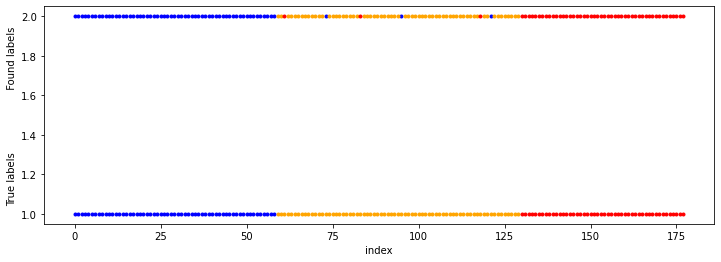

In [17]:
# Use a plot to compare the true labels to the found labels
ax = plt.figure(figsize = (12, 4))
true_clusters = [wine.index[labels == i] for i in range(1,4)]     # in the data set labels are 1, 2, 3
found_clusters = [wine.index[clusters == i] for i in range(3)]    # but kmeans will label them 0, 1, 2
found_clusters.sort(key = lambda l: min(l))                     # kmeans doesn't order clusters
colors = ['blue', 'orange', 'red']
for i in range(3):
    plt.plot(true_clusters[i], np.ones_like(true_clusters[i]), '.', color = colors[i])
    plt.plot(found_clusters[i], 2 * np.ones_like(found_clusters[i]), '.', color = colors[i])
plt.xlabel('index')
plt.ylabel('True labels' + 20 * ' ' + 'Found labels')
plt.show()

Again, much better.

Don't forget to scale your inputs!

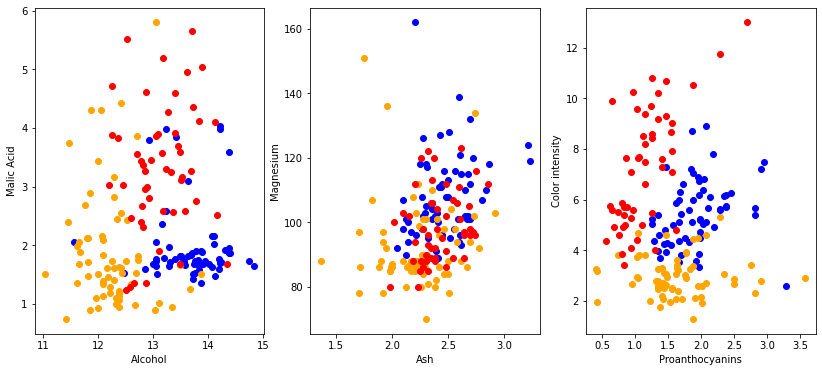

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (14, 6))
for i in range(3):
    ax1.plot(wine.loc[found_clusters[i], 'Alcohol'], 
             wine.loc[found_clusters[i],'Malic Acid'],
             'o', color = colors[i])
ax1.set_xlabel('Alcohol')
ax1.set_ylabel('Malic Acid')
for i in range(3):
    ax2.plot(wine.loc[found_clusters[i],'Ash'], 
             wine.loc[found_clusters[i],'Magnesium'],
             'o', color = colors[i])
ax2.set_xlabel('Ash')
ax2.set_ylabel('Magnesium')
for i in range(3):
    ax3.plot(wine.loc[found_clusters[i],'Proanthocynanins'], 
             wine.loc[found_clusters[i], 'Color intensity'],
             'o', color = colors[i])
ax3.set_xlabel('Proanthocyanins')
ax3.set_ylabel('Color intensity')
plt.show()